In [1]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
import copy

In [2]:
dataset = load_dataset('cifar100', split='test')

Found cached dataset cifar100 (/Users/andrejerkelens/.cache/huggingface/datasets/cifar100/cifar100/1.0.0/f365c8b725c23e8f0f8d725c3641234d9331cd2f62919d1381d1baa5b3ba3142)


In [3]:
def show_img(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [4]:
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
cifar0 = dataset[0]['img']

In [8]:
cv_image = np.array(cifar0)

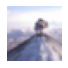

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(cv_image)
plt.axis("off")
plt.show()

In [10]:
masks = mask_generator.generate(cv_image)

In [19]:
dataset[0]['coarse_label']

10

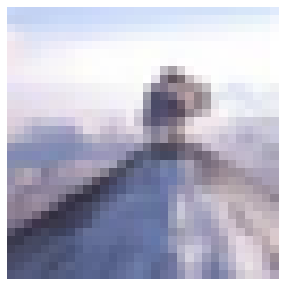

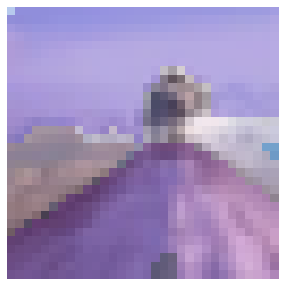

In [14]:
plt.figure(figsize=(5,5))
plt.imshow(cv_image)
plt.axis('off')
plt.show();

plt.figure(figsize=(5,5))
plt.imshow(cv_image)
show_img(masks)
plt.axis('off')
plt.show();

In [21]:
import pickle

In [22]:
with open("output/interactions_cifar_test_0.pickle", "rb") as f:
    cifar0_interactions = pickle.load(f)

In [27]:
mask['segmentation'].shape

(32, 32)

In [71]:
mask

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 8,
 'bbox': [17, 29, 2, 2],
 'predicted_iou': 0.9089388251304626,
 'point_coords': [[19.5, 29.5]],
 'stability_score': 1.0,
 'crop_box': [0, 0, 32, 32],
 'edges': [(29, 18), (29, 19), (30, 17), (30, 19), (31, 17), (31, 19)]}

In [30]:
def find_edges(matrix):

    rows, cols = len(matrix), len(matrix[0])
    edges = []

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j]:
                neighbors = []

                # Check neighboring cells
                if i - 1 >= 0:
                    neighbors.append(matrix[i - 1][j])
                if i + 1 < rows:
                    neighbors.append(matrix[i + 1][j])
                if j - 1 >= 0:
                    neighbors.append(matrix[i][j - 1])
                if j + 1 < cols:
                    neighbors.append(matrix[i][j + 1])

                # Check if there's at least one True and one False among the neighbors
                if True in neighbors and False in neighbors:
                    edges.append((i, j))

    return edges

In [41]:
cifar0_edges = []
for mask in masks:
    mask['edges'] = find_edges(mask['segmentation'])
    cifar0_edges.append(mask['edges'])

cifar0_edges = [e for m in cifar0_edges for e in m]

In [60]:
matching_keys = []

#TODO: Fix the keys in the drop code
for key in cifar0_interactions:
    for edge in cifar0_edges:
        if edge in key:
            matching_keys.append(key)

In [68]:
cifar0_avg_int = np.array(list(cifar0_interactions.values())).mean()

cifar0_edge_avg_int = np.array([cifar0_interactions[key] for key in matching_keys])

In [70]:
cifar0_avg_int

0.2379601

In [69]:
cifar0_edge_avg_int.mean()

0.18205738

In [61]:
matching_keys

[((0, 0), (15, 0)),
 ((0, 0), (16, 0)),
 ((0, 0), (26, 0)),
 ((0, 0), (27, 0)),
 ((0, 0), (15, 1)),
 ((0, 0), (16, 1)),
 ((0, 0), (25, 1)),
 ((0, 0), (26, 1)),
 ((0, 0), (14, 2)),
 ((0, 0), (15, 2)),
 ((0, 0), (24, 2)),
 ((0, 0), (26, 2)),
 ((0, 0), (13, 3)),
 ((0, 0), (14, 3)),
 ((0, 0), (24, 3)),
 ((0, 0), (25, 3)),
 ((0, 0), (13, 4)),
 ((0, 0), (14, 4)),
 ((0, 0), (23, 4)),
 ((0, 0), (25, 4)),
 ((0, 0), (13, 5)),
 ((0, 0), (14, 5)),
 ((0, 0), (22, 5)),
 ((0, 0), (24, 5)),
 ((0, 0), (13, 6)),
 ((0, 0), (14, 6)),
 ((0, 0), (22, 6)),
 ((0, 0), (23, 6)),
 ((0, 0), (13, 7)),
 ((0, 0), (14, 7)),
 ((0, 0), (21, 7)),
 ((0, 0), (22, 7)),
 ((0, 0), (13, 8)),
 ((0, 0), (15, 8)),
 ((0, 0), (21, 8)),
 ((0, 0), (22, 8)),
 ((0, 0), (14, 9)),
 ((0, 0), (16, 9)),
 ((0, 0), (20, 9)),
 ((0, 0), (21, 9)),
 ((0, 0), (14, 10)),
 ((0, 0), (16, 10)),
 ((0, 0), (19, 10)),
 ((0, 0), (21, 10)),
 ((0, 0), (14, 11)),
 ((0, 0), (16, 11)),
 ((0, 0), (19, 11)),
 ((0, 0), (20, 11)),
 ((0, 0), (13, 12)),
 ((0, 0), (

In [50]:
cifar0_interactions

{((0, 0), (1, 0)): 0.55671453,
 ((0, 0), (2, 0)): 0.5108725,
 ((0, 0), (3, 0)): 0.4357705,
 ((0, 0), (4, 0)): 0.4103806,
 ((0, 0), (5, 0)): 0.34632266,
 ((0, 0), (6, 0)): 0.45729977,
 ((0, 0), (7, 0)): 0.28916314,
 ((0, 0), (8, 0)): 0.46161404,
 ((0, 0), (9, 0)): 0.36525014,
 ((0, 0), (10, 0)): 0.38074702,
 ((0, 0), (11, 0)): 0.29846415,
 ((0, 0), (12, 0)): 0.27281907,
 ((0, 0), (13, 0)): 0.30728495,
 ((0, 0), (14, 0)): 0.21309558,
 ((0, 0), (15, 0)): 0.35498723,
 ((0, 0), (16, 0)): 0.30152938,
 ((0, 0), (17, 0)): 0.3692967,
 ((0, 0), (18, 0)): 0.21306477,
 ((0, 0), (19, 0)): 0.20300145,
 ((0, 0), (20, 0)): 0.20372272,
 ((0, 0), (21, 0)): 0.20699191,
 ((0, 0), (22, 0)): 0.1458333,
 ((0, 0), (23, 0)): 0.13754204,
 ((0, 0), (24, 0)): 0.1658686,
 ((0, 0), (25, 0)): 0.1290593,
 ((0, 0), (26, 0)): 0.129588,
 ((0, 0), (27, 0)): 0.14181541,
 ((0, 0), (28, 0)): 0.14072244,
 ((0, 0), (29, 0)): 0.5280399,
 ((0, 0), (30, 0)): 0.3026165,
 ((0, 0), (31, 0)): 0.44306445,
 ((0, 0), (0, 1)): 0.3422062

In [51]:
cifar0_edges

[[(6, 18),
  (6, 19),
  (6, 20),
  (7, 17),
  (7, 21),
  (8, 17),
  (8, 22),
  (8, 23),
  (9, 16),
  (9, 24),
  (10, 15),
  (10, 24),
  (11, 15),
  (11, 24),
  (12, 15),
  (12, 24),
  (12, 25),
  (12, 26),
  (12, 27),
  (12, 28),
  (12, 29),
  (12, 30),
  (12, 31),
  (13, 3),
  (13, 4),
  (13, 5),
  (13, 6),
  (13, 7),
  (13, 8),
  (13, 12),
  (13, 15),
  (14, 2),
  (14, 9),
  (14, 10),
  (14, 11),
  (14, 13),
  (14, 14),
  (14, 15),
  (15, 0),
  (15, 1),
  (15, 15)],
 [(16, 16),
  (16, 17),
  (16, 18),
  (16, 19),
  (16, 20),
  (16, 21),
  (17, 15),
  (17, 22),
  (17, 23),
  (18, 14),
  (18, 24),
  (18, 25),
  (19, 12),
  (19, 13),
  (19, 26),
  (20, 11),
  (20, 27),
  (21, 9),
  (21, 10),
  (21, 28),
  (21, 29),
  (22, 7),
  (22, 8),
  (22, 30),
  (23, 6),
  (23, 31),
  (24, 5),
  (25, 3),
  (25, 4),
  (26, 1),
  (26, 2),
  (27, 0)],
 [(14, 3),
  (14, 4),
  (14, 5),
  (14, 6),
  (14, 7),
  (15, 2),
  (15, 8),
  (16, 0),
  (16, 1),
  (16, 9),
  (16, 10),
  (16, 11),
  (16, 12),
  (16,

In [34]:
edges = find_edges(mask['segmentation'])

[(29, 18), (29, 19), (30, 17), (30, 19), (31, 17), (31, 19)]

In [26]:
for mask in masks:
    print(mask)

{'segmentation': array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 406, 'bbox': [0, 0, 31, 15], 'predicted_iou': 1.0037802457809448, 'point_coords': [[0.5, 14.5]], 'stability_score': 0.9685230255126953, 'crop_box': [0, 0, 32, 32]}
{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), 'area': 377, 'bbox': [0, 16, 31, 15], 'predicted_iou': 0.9766274690628052, 'point_coords': [[2

In [75]:
cifar0_interactions[((0,0),(0,1))]

0.3422062

In [91]:
def get_neighbors(rows, cols, n_pixels):

    directions = [
        (-1, 0),  # up
        (1, 0),  # down
        (0, -1),  # left
        (0, 1),  # right
        (-1, -1),  # upper left diagonal
        (-1, 1),  # upper right diagonal
        (1, -1),  # lower left diagonal
        (1, 1)   # lower right diagonal
    ]

    result = {}

    for i in range(rows):
        for j in range(cols):
            neighbors = []
            for dx, dy in directions:
                for distance in range(1, n_pixels + 1):
                    x, y = i + dx * distance, j + dy * distance
                    if 0 <= x < rows and 0 <= y < cols:
                        neighbors.append((x, y))
            result[(i, j)] = neighbors

    return result

In [92]:
cv_image.shape[:-1]

(32, 32)

In [93]:
H,W = cv_image.shape[:-1]

In [94]:
all_neighbors = get_neighbors(H, W, 2)

In [97]:
len(all_neighbors[(2,2)])

16

In [106]:
surrounding_interactions = {}
surrounding_matrix = np.empty((32,32))
for i in range(H):
    for j in range(W):
        pix_val = (i,j)
        neigh = all_neighbors[pix_val]
        arr = []
        for n in neigh:
            pair = (pix_val, n)
            if pair in cifar0_interactions:
                arr.append(cifar0_interactions[pair])
            elif pair[::-1] in cifar0_interactions:
                arr.append(cifar0_interactions[pair[::-1]])
            else:
                raise ValueError("Pair not in interactions")
        avg_int = np.mean(arr)
        surrounding_interactions[pix_val] = avg_int



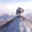

In [108]:
cifar0

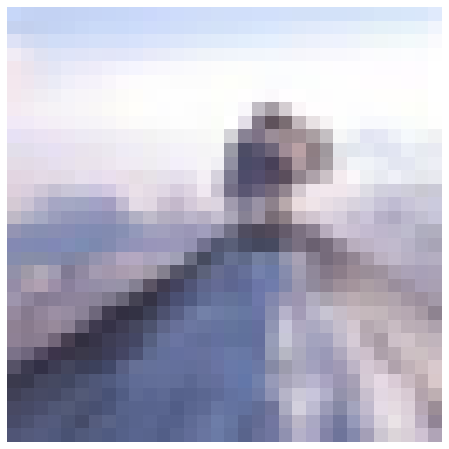

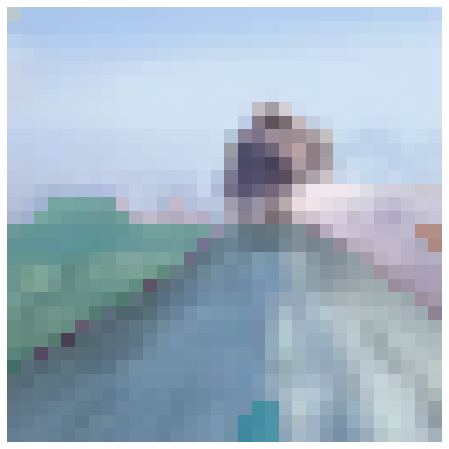

In [110]:
plt.figure(figsize=(8,8))
plt.imshow(cv_image)
plt.axis('off')
plt.show();

plt.figure(figsize=(8,8))
plt.imshow(cv_image)
show_img(masks)
plt.axis('off')
plt.show();


plt.figure(figsize=(8,8))

In [107]:
surrounding_interactions

{(0, 0): 0.41490975,
 (0, 1): 0.42157865,
 (0, 2): 0.4523681,
 (0, 3): 0.47314572,
 (0, 4): 0.54513276,
 (0, 5): 0.49595228,
 (0, 6): 0.5771737,
 (0, 7): 0.50396913,
 (0, 8): 0.5366181,
 (0, 9): 0.5434743,
 (0, 10): 0.54896116,
 (0, 11): 0.5773107,
 (0, 12): 0.55063236,
 (0, 13): 0.5964824,
 (0, 14): 0.53629845,
 (0, 15): 0.54656565,
 (0, 16): 0.52001333,
 (0, 17): 0.5316323,
 (0, 18): 0.5845484,
 (0, 19): 0.57007635,
 (0, 20): 0.5967075,
 (0, 21): 0.5718297,
 (0, 22): 0.5419717,
 (0, 23): 0.49629802,
 (0, 24): 0.4793617,
 (0, 25): 0.44861928,
 (0, 26): 0.42353392,
 (0, 27): 0.4620398,
 (0, 28): 0.44475895,
 (0, 29): 0.43726763,
 (0, 30): 0.41031837,
 (0, 31): 0.4451497,
 (1, 0): 0.6766813,
 (1, 1): 0.41991538,
 (1, 2): 0.50934017,
 (1, 3): 0.46958926,
 (1, 4): 0.5240651,
 (1, 5): 0.6234217,
 (1, 6): 0.50462765,
 (1, 7): 0.6658668,
 (1, 8): 0.49601987,
 (1, 9): 0.62963855,
 (1, 10): 0.5045057,
 (1, 11): 0.6091521,
 (1, 12): 0.5743311,
 (1, 13): 0.5771423,
 (1, 14): 0.676913,
 (1, 15): 